In [1]:
import pandas as pd

## 1- loading DataSets

In [2]:

df = pd.read_csv('../data/results.csv', encoding='latin-1')
df.head()


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2-Preprocessing 

In [3]:
df.dtypes

Season       object
DateTime     object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

In [4]:
# Convert DateTime column to datetime type and extract only date (remove time)
df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date
# Convert back to datetime (but keeping only date part)
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [5]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#drop the 'Referee' column
df.drop(columns=['Referee'], inplace=True)


In [7]:
#drop the 'HTR' column
df.drop(columns=['HTR'], inplace=True)

In [8]:
# Convert 'Season' column to integer type by extracting the starting year
df['Season'] = df['Season'].str.split('-').str[0].astype(int)


In [9]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993,1993-08-14,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,1993-08-14,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993,1993-08-14,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,1993-08-14,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993,1993-08-14,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dtypes

Season               int64
DateTime    datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG               float64
HTAG               float64
HS                 float64
AS                 float64
HST                float64
AST                float64
HC                 float64
AC                 float64
HF                 float64
AF                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
dtype: object

In [11]:
#drop seasons from 1993 to 1999
df.drop(df[(df['Season'] >= 1993) & (df['Season'] < 2000)].index, inplace=True)
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000,2000-08-19,Charlton,Man City,4,0,H,2.0,0.0,17.0,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,2000,2000-08-19,Chelsea,West Ham,4,2,H,1.0,0.0,17.0,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000,2000-08-19,Coventry,Middlesbrough,1,3,A,1.0,1.0,6.0,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000,2000-08-19,Derby,Southampton,2,2,D,1.0,2.0,6.0,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000,2000-08-19,Leeds,Everton,2,0,H,2.0,0.0,17.0,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [12]:
#reset index after dropping rows
df.reset_index(drop=True, inplace=True)
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000,2000-08-19,Charlton,Man City,4,0,H,2.0,0.0,17.0,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000,2000-08-19,Chelsea,West Ham,4,2,H,1.0,0.0,17.0,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000,2000-08-19,Coventry,Middlesbrough,1,3,A,1.0,1.0,6.0,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000,2000-08-19,Derby,Southampton,2,2,D,1.0,2.0,6.0,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000,2000-08-19,Leeds,Everton,2,0,H,2.0,0.0,17.0,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [13]:
#map 'FTR' column to numerical values: 'H' = 1, 'A' = -1, 'D' = 0
df['FTR'] = df['FTR'].map({'H': 1, 'A': -1, 'D': 0})


In [14]:
#convert 'FTR' column to float64 type
df['FTR'] = df['FTR'].astype('float64')


In [15]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000,2000-08-19,Charlton,Man City,4,0,1.0,2.0,0.0,17.0,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000,2000-08-19,Chelsea,West Ham,4,2,1.0,1.0,0.0,17.0,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000,2000-08-19,Coventry,Middlesbrough,1,3,-1.0,1.0,1.0,6.0,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000,2000-08-19,Derby,Southampton,2,2,0.0,1.0,2.0,6.0,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000,2000-08-19,Leeds,Everton,2,0,1.0,2.0,0.0,17.0,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [16]:
df.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8284,2021,2022-04-09,Aston Villa,Tottenham,0,4,-1.0,0.0,1.0,9.0,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
8285,2021,2022-04-10,Brentford,West Ham,2,0,1.0,0.0,0.0,15.0,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
8286,2021,2022-04-10,Leicester,Crystal Palace,2,1,1.0,2.0,0.0,12.0,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
8287,2021,2022-04-10,Norwich,Burnley,2,0,1.0,1.0,0.0,17.0,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
8288,2021,2022-04-10,Man City,Liverpool,2,2,0.0,2.0,1.0,11.0,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [17]:
df.dtypes

Season               int64
DateTime    datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                float64
HTHG               float64
HTAG               float64
HS                 float64
AS                 float64
HST                float64
AST                float64
HC                 float64
AC                 float64
HF                 float64
AF                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
dtype: object

## ploting 

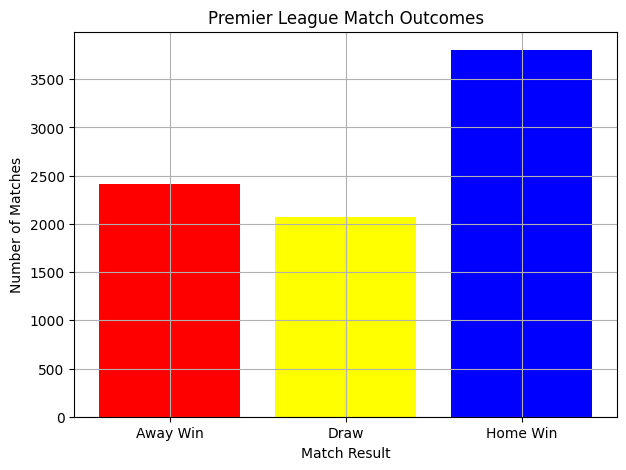

FTR
Away Win    2417
Draw        2069
Home Win    3803
Name: count, dtype: int64


In [18]:
import matplotlib.pyplot as plt
counts = df['FTR'].value_counts().sort_index()

outcome_labels = {-1: 'Away Win', 0: 'Draw', 1: 'Home Win'}
counts.index = counts.index.map(outcome_labels)

plt.figure(figsize=(7,5))
plt.bar(counts.index, counts.values, color=['red', 'yellow', 'blue'])
plt.title("Premier League Match Outcomes")
plt.xlabel("Match Result")
plt.ylabel("Number of Matches")
plt.grid()
plt.show()
print(counts)

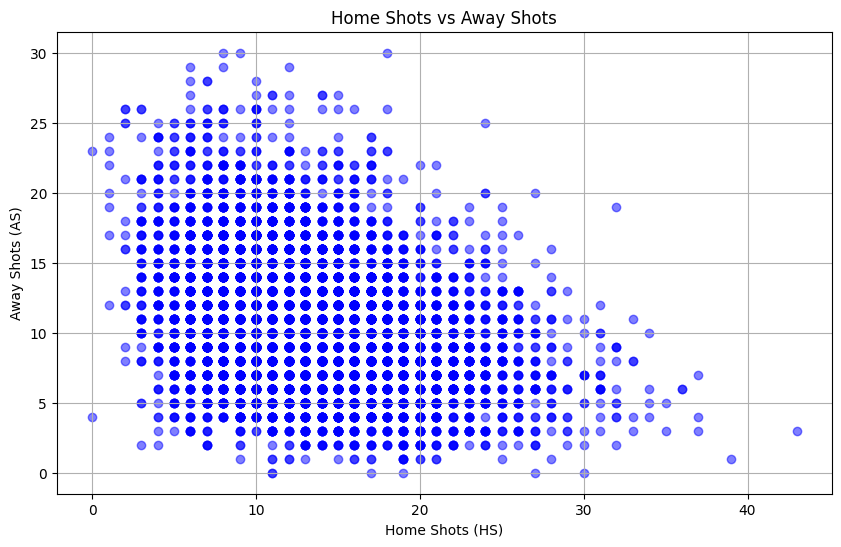

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['HS'], df['AS'], alpha=0.5,color='blue')
plt.xlabel('Home Shots (HS)')
plt.ylabel('Away Shots (AS)')
plt.title('Home Shots vs Away Shots')
plt.grid(True)
plt.show()

In [20]:
counthome = df['HomeTeam'].value_counts()
countaway = df['AwayTeam'].value_counts()
all=countaway+counthome
all.sort_values(ascending=False)

Man United          829
Tottenham           829
Liverpool           829
Arsenal             828
Chelsea             828
Everton             828
Man City            791
Newcastle           753
West Ham            716
Aston Villa         715
Fulham              570
Southampton         563
Sunderland          532
West Brom           494
Bolton              418
Blackburn           418
Leicester           409
Stoke               380
Middlesbrough       380
Crystal Palace      373
Wigan               304
Wolves              298
Burnley             296
Swansea             266
Charlton            266
Portsmouth          266
Birmingham          266
Norwich             259
Watford             259
Leeds               222
Hull                190
Bournemouth         190
Brighton            183
Reading             114
QPR                 114
Derby               114
Sheffield United    114
Huddersfield         76
Ipswich              76
Cardiff              76
Blackpool            38
Bradford        

## -----------------------------------------------feature engeniring----------------------------------------

##  ----------------------------------------------avg goals for each team---------------------------------------

In [21]:

def add_avg_goals_features_team_grouped(df, window=10):

    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    df['home_team_avg_goals_last10'] = 0.0
    df['away_team_avg_goals_last10'] = 0.0


    # Get all unique teams
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    # Process each team
    for team in all_teams:

        #  Get all matches for this team
        team_home_matches = df[df['HomeTeam'] == team][['DateTime', 'FTHG']].copy()
        team_home_matches['place'] = 'home'
        team_home_matches['goals_scored'] = team_home_matches['FTHG']

        team_away_matches = df[df['AwayTeam'] == team][['DateTime', 'FTAG']].copy()
        team_away_matches['place'] = 'away'
        team_away_matches['goals_scored'] = team_away_matches['FTAG']

        #  merge
        team_all_matches = pd.concat([
            team_home_matches[['DateTime', 'place', 'goals_scored']],
            team_away_matches[['DateTime', 'place', 'goals_scored']]
        ]).sort_values('DateTime').reset_index(drop=True)

        #  avg
        averages = []

        for i in range(len(team_all_matches)):
            if i == 0:
                # no previous history
                avg = 0.0
            else:
                # Calculate average of previous matches
                start_idx = max(0, i - window)
                previous_goals = team_all_matches['goals_scored'].iloc[start_idx:i]
                avg = previous_goals.mean()

            averages.append(avg)

        #Map back to original dataframe
        team_all_matches['averages'] = averages


        team_avg_dict = dict(zip(team_all_matches['DateTime'], team_all_matches['averages']))

        #
        home_bool = df['HomeTeam'] == team
        df.loc[home_bool, 'home_team_avg_goals_last10'] = df.loc[home_bool, 'DateTime'].map(team_avg_dict).fillna(0)

        away_bool = df['AwayTeam'] == team
        df.loc[away_bool, 'away_team_avg_goals_last10'] = df.loc[away_bool, 'DateTime'].map(team_avg_dict).fillna(0)

    return df

df = add_avg_goals_features_team_grouped(df, window=10)


In [22]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HC,AC,HF,AF,HY,AY,HR,AR,home_team_avg_goals_last10,away_team_avg_goals_last10
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,2.0,9.0,10.0,21.0,3.0,1.0,0.0,1.0,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0,0.000000,1.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,8.0,3.0,12.0,15.0,0.0,1.0,0.0,0.0,1.000000,2.000000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,7.0,6.0,16.0,22.0,3.0,1.0,0.0,0.0,1.666667,2.333333
45,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,4.0,10.0,17.0,13.0,0.0,2.0,0.0,0.0,0.500000,2.250000
54,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,8.0,4.0,5.0,13.0,1.0,2.0,0.0,0.0,2.000000,1.000000
66,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,4.0,7.0,8.0,13.0,1.0,2.0,0.0,0.0,1.166667,2.000000
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,3.0,11.0,18.0,17.0,2.0,3.0,0.0,0.0,1.857143,2.857143
85,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,7.0,4.0,12.0,20.0,1.0,4.0,0.0,1.0,1.750000,1.571429
89,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,5.0,4.0,15.0,11.0,1.0,0.0,0.0,0.0,1.222222,1.666667


##  ----------------------------------------------avg conversion for each team---------------------------------------

In [23]:
#abudlmajeed
def add_conversion_rate_features(df, window=10):
    """
    Add offensive efficiency features (conversion rate)
    for home and away teams based on recent matches.
    """

    df = df.sort_values('DateTime').reset_index(drop=True).copy()


    df['home_conversion_rate_last10'] = 0.0
    df['away_conversion_rate_last10'] = 0.0


    for idx in range(len(df)):
        if idx % 1000 == 0:
            print(f"Processed {idx}/{len(df)} matches")

        current_match = df.iloc[idx]
        home_team = current_match['HomeTeam']
        away_team = current_match['AwayTeam']
        current_date = current_match['DateTime']


        prev_matches = df[df['DateTime'] < current_date]


        home_prev = prev_matches[
            (prev_matches['HomeTeam'] == home_team) |
            (prev_matches['AwayTeam'] == home_team)
        ].tail(window)

        if len(home_prev) > 0:
            goals, shots = [], []
            for _, m in home_prev.iterrows():
                if m['HomeTeam'] == home_team:
                    goals.append(m['FTHG'])
                    shots.append(m['HS'])
                else:
                    goals.append(m['FTAG'])
                    shots.append(m['AS'])

            if sum(shots) > 0:
                df.loc[idx, 'home_conversion_rate_last10'] = sum(goals) / sum(shots)


        away_prev = prev_matches[
            (prev_matches['HomeTeam'] == away_team) |
            (prev_matches['AwayTeam'] == away_team)
        ].tail(window)

        if len(away_prev) > 0:
            goals, shots = [], []
            for _, m in away_prev.iterrows():
                if m['HomeTeam'] == away_team:
                    goals.append(m['FTHG'])
                    shots.append(m['HS'])
                else:
                    goals.append(m['FTAG'])
                    shots.append(m['AS'])
            if sum(shots) > 0:
                df.loc[idx, 'away_conversion_rate_last10'] = sum(goals) / sum(shots)

    print("Conversion rate features created successfully!")
    return df

In [24]:
df=add_conversion_rate_features(df, window=10)

Processed 0/8289 matches
Processed 1000/8289 matches
Processed 2000/8289 matches
Processed 3000/8289 matches
Processed 4000/8289 matches
Processed 5000/8289 matches
Processed 6000/8289 matches
Processed 7000/8289 matches
Processed 8000/8289 matches
Conversion rate features created successfully!


In [25]:

df[(df['HomeTeam']=='Liverpool') | (df['AwayTeam']=='Liverpool')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HF,AF,HY,AY,HR,AR,home_team_avg_goals_last10,away_team_avg_goals_last10,home_conversion_rate_last10,away_conversion_rate_last10
6,2000,2000-08-19,Liverpool,Bradford,1,0,1.0,0.0,0.0,16.0,...,8.0,8.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,25.0,20.0,2.0,4.0,1.0,2.0,0.000000,1.000000,0.000000,0.062500
26,2000,2000-08-26,Southampton,Liverpool,3,3,0.0,0.0,1.0,14.0,...,7.0,6.0,0.0,0.0,0.0,0.0,1.500000,0.500000,0.120000,0.043478
38,2000,2000-09-06,Liverpool,Aston Villa,3,1,1.0,3.0,0.0,11.0,...,13.0,7.0,0.0,2.0,0.0,0.0,1.333333,0.500000,0.125000,0.058824
43,2000,2000-09-09,Liverpool,Man City,3,2,1.0,1.0,0.0,14.0,...,17.0,17.0,3.0,4.0,0.0,0.0,1.750000,1.750000,0.162791,0.155556
57,2000,2000-09-17,West Ham,Liverpool,1,1,0.0,0.0,1.0,15.0,...,5.0,13.0,0.0,2.0,0.0,0.0,1.000000,2.000000,0.068493,0.175439
66,2000,2000-09-23,Liverpool,Sunderland,1,1,0.0,1.0,1.0,11.0,...,14.0,18.0,2.0,2.0,0.0,0.0,1.833333,1.000000,0.171875,0.095238
77,2000,2000-10-01,Chelsea,Liverpool,3,0,1.0,2.0,0.0,11.0,...,14.0,14.0,1.0,1.0,0.0,0.0,1.428571,1.714286,0.107527,0.160000
87,2000,2000-10-15,Derby,Liverpool,0,4,-1.0,0.0,1.0,6.0,...,18.0,13.0,1.0,1.0,0.0,0.0,1.750000,1.500000,0.179487,0.141176
94,2000,2000-10-21,Liverpool,Leicester,1,0,1.0,0.0,0.0,24.0,...,8.0,10.0,1.0,2.0,0.0,0.0,1.777778,0.777778,0.158416,0.081395


##  ----------------------------------------------avg winrate for each team---------------------------------------

In [26]:
def add_avg_winrate_team(df, window=10):
    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    df['home_team_winrate_last10'] = 0.0
    df['away_team_winrate_last10'] = 0.0

    # Get all unique teams
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    for team in all_teams:
        team_home_matches = df[df['HomeTeam'] == team][['DateTime', 'FTR']].copy()
        team_home_matches['place'] = 'home'
        team_home_matches['win'] = (team_home_matches['FTR'] == 1).astype(int)

        team_away_matches = df[df['AwayTeam'] == team][['DateTime', 'FTR']].copy()
        team_away_matches['place'] = 'away'
        team_away_matches['win'] = (team_away_matches['FTR'] == -1).astype(int)

        # Combine
        team_all_matches = pd.concat([
            team_home_matches[['DateTime', 'place', 'win']],
            team_away_matches[['DateTime', 'place', 'win']]
        ]).sort_values('DateTime').reset_index(drop=True)

        averages = []

        for i in range(len(team_all_matches)):
            if i == 0:
                # no previous history
                avg = 0.0
            else:
                start_idx = max(0, i - window)
                previous_wins = team_all_matches['win'].iloc[start_idx:i]
                avg = previous_wins.mean()

            averages.append(avg)

        team_all_matches['avg_winrate'] = averages


        team_avg_dict = dict(zip(team_all_matches['DateTime'], team_all_matches['avg_winrate']))

        # Apply to original dataframe based on home/away position
        # For home team
        home_bool = df['HomeTeam'] == team
        df.loc[home_bool, 'home_team_winrate_last10'] = df.loc[home_bool, 'DateTime'].map(team_avg_dict).fillna(0)

        # For away team
        away_bool = df['AwayTeam'] == team
        df.loc[away_bool, 'away_team_winrate_last10'] = df.loc[away_bool, 'DateTime'].map(team_avg_dict).fillna(0)

    return df

# Apply the function
df = add_avg_winrate_team(df, window=10)


In [27]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HY,AY,HR,AR,home_team_avg_goals_last10,away_team_avg_goals_last10,home_conversion_rate_last10,away_conversion_rate_last10,home_team_winrate_last10,away_team_winrate_last10
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,3.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,2.0,4.0,1.0,2.0,0.000000,1.000000,0.000000,0.062500,0.000000,1.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,0.0,1.0,0.0,0.0,1.000000,2.000000,0.064516,0.160000,0.500000,0.500000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,3.0,1.0,0.0,0.0,1.666667,2.333333,0.119048,0.142857,0.333333,0.666667
46,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,0.0,2.0,0.0,0.0,0.500000,2.250000,0.068966,0.145161,0.250000,0.500000
53,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,1.0,2.0,0.0,0.0,2.000000,1.000000,0.125000,0.113636,0.400000,0.400000
62,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,1.0,2.0,0.0,0.0,1.166667,2.000000,0.092105,0.122449,0.333333,0.500000
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,2.0,3.0,0.0,0.0,1.857143,2.857143,0.120370,0.188679,0.428571,0.571429
84,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,1.0,4.0,0.0,1.0,1.750000,1.571429,0.121739,0.157143,0.500000,0.428571
91,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,1.0,0.0,0.0,0.0,1.222222,1.666667,0.090909,0.114504,0.111111,0.555556


##  ----------------------------------------------avg Conceded for each team---------------------------------------


In [28]:
def add_avg_goals_conceded_features_team_grouped(df, window=10):

    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    df['home_team_avg_goals_conceded_last10'] = 0.0
    df['away_team_avg_goals_conceded_last10'] = 0.0

    # Get all unique teams
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    for team in all_teams:

        # Get all matches for this team (home + away)
        # When team plays at home, they concede FTAG (away goals)
        team_home_matches = df[df['HomeTeam'] == team][['DateTime', 'FTAG']].copy()
        team_home_matches['place'] = 'home'
        team_home_matches['goals_conceded'] = team_home_matches['FTAG']

        # When team plays away, they concede FTHG (home goals)
        team_away_matches = df[df['AwayTeam'] == team][['DateTime', 'FTHG']].copy()
        team_away_matches['place'] = 'away'
        team_away_matches['goals_conceded'] = team_away_matches['FTHG']

        #  Combine and sort by datetime ascending
        team_all_matches = pd.concat([
            team_home_matches[['DateTime', 'place', 'goals_conceded']],
            team_away_matches[['DateTime', 'place', 'goals_conceded']]
        ]).sort_values('DateTime').reset_index(drop=True)

        # Calculate rolling average (starting from 0)
        averages = []

        for i in range(len(team_all_matches)):
            if i == 0:
                # no previous history
                avg = 0.0
            else:
                # Calculate average of previous matches
                start_idx = max(0, i - window)
                previous_goals = team_all_matches['goals_conceded'].iloc[start_idx:i]
                avg = previous_goals.mean()

            averages.append(avg)

        # Map back to original dataframe
        team_all_matches['avg'] = averages

        # Create lookup dictionary by datetime
        team_avg_dict = dict(zip(team_all_matches['DateTime'], team_all_matches['avg']))

        # Step 5: Apply to original dataframe based on home/away position
        # For home team
        home_mask = df['HomeTeam'] == team
        df.loc[home_mask, 'home_team_avg_goals_conceded_last10'] = df.loc[home_mask, 'DateTime'].map(team_avg_dict).fillna(0)

        # For away team
        away_mask = df['AwayTeam'] == team
        df.loc[away_mask, 'away_team_avg_goals_conceded_last10'] = df.loc[away_mask, 'DateTime'].map(team_avg_dict).fillna(0)

    return df

# Apply the function
df = add_avg_goals_conceded_features_team_grouped(df, window=10)


In [29]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HR,AR,home_team_avg_goals_last10,away_team_avg_goals_last10,home_conversion_rate_last10,away_conversion_rate_last10,home_team_winrate_last10,away_team_winrate_last10,home_team_avg_goals_conceded_last10,away_team_avg_goals_conceded_last10
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,1.0,2.0,0.000000,1.000000,0.000000,0.062500,0.000000,1.000000,1.000000,0.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,0.0,0.0,1.000000,2.000000,0.064516,0.160000,0.500000,0.500000,0.500000,1.500000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,0.0,0.0,1.666667,2.333333,0.119048,0.142857,0.333333,0.666667,1.666667,1.333333
39,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,0.0,0.0,0.500000,2.250000,0.068966,0.145161,0.250000,0.500000,1.750000,1.500000
51,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,0.0,0.0,2.000000,1.000000,0.125000,0.113636,0.400000,0.400000,1.400000,1.400000
66,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,0.0,0.0,1.166667,2.000000,0.092105,0.122449,0.333333,0.500000,1.500000,1.333333
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,0.0,0.0,1.857143,2.857143,0.120370,0.188679,0.428571,0.571429,1.285714,1.000000
79,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,0.0,1.0,1.750000,1.571429,0.121739,0.157143,0.500000,0.428571,1.125000,1.000000
92,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,0.0,0.0,1.222222,1.666667,0.090909,0.114504,0.111111,0.555556,1.333333,1.000000


##  ----------------------------------------------home advantage "working on it"---------------------------------------


In [30]:
import pandas as pd
import numpy as np

def add_home_advantage_feature(df, min_games=10):
    print("Calculating home advantage feature...")

    # 1. Ensure sorted by date and reset index
    df = df.sort_values('DateTime').reset_index(drop=True)

    # 2. Map FTR to points
    df['HomePoints'] = df['FTR'].map({1: 3, 0: 1, -1: 0})
    df['AwayPoints'] = df['FTR'].map({1: 0, 0: 1, -1: 3})

    # 3. Restructure to long format for easier calculation per team
    home_data = df[['DateTime', 'HomeTeam', 'HomePoints']].rename(columns={'HomeTeam': 'Team', 'HomePoints': 'Points'})
    home_data['Venue'] = 'Home'

    away_data = df[['DateTime', 'AwayTeam', 'AwayPoints']].rename(columns={'AwayTeam': 'Team', 'AwayPoints': 'Points'})
    away_data['Venue'] = 'Away'

    all_matches = pd.concat([home_data, away_data]).sort_values(['Team', 'DateTime']).reset_index(drop=True)

    # 4. Calculate expanding average points per team per venue, lagged by 1
    # expanding().mean() calculates the mean up to that point
    # shift(1) uses the mean before the current match
    all_matches['AvgPointsVenue_hist'] = all_matches.groupby(['Team', 'Venue'])['Points'].transform(
        lambda x: x.expanding(min_periods=min_games).mean().shift(1)
    ).fillna(0) # Fill NaN for early games

    # 5. Pivot to get Avg Home Points and Avg Away Points in one row per team/date
    avg_points_pivot = all_matches.pivot_table(
        index=['Team', 'DateTime'],
        columns='Venue',
        values='AvgPointsVenue_hist'
    ).reset_index()
    # Ensure correct column names after pivot
    avg_points_pivot.columns = ['Team', 'DateTime', 'AvgAwayPoints_hist', 'AvgHomePoints_hist']
    avg_points_pivot = avg_points_pivot.fillna(0) # Fill NaNs if one venue avg is missing

    # 6. Calculate historical home advantage for each team up to that date
    avg_points_pivot['HistHomeAdvantage'] = avg_points_pivot['AvgHomePoints_hist'] - avg_points_pivot['AvgAwayPoints_hist']

    # 7. Merge this back into the original dataframe
    # Merge for HomeTeam
    df = pd.merge(
        df,
        avg_points_pivot[['Team', 'DateTime', 'HistHomeAdvantage']],
        left_on=['HomeTeam', 'DateTime'],
        right_on=['Team', 'DateTime'],
        how='left'
    ).rename(columns={'HistHomeAdvantage': 'HomeTeam_HomeAdvantage'}).drop('Team', axis=1)

    # Merge for AwayTeam
    df = pd.merge(
        df,
        avg_points_pivot[['Team', 'DateTime', 'HistHomeAdvantage']],
        left_on=['AwayTeam', 'DateTime'],
        right_on=['Team', 'DateTime'],
        how='left'
    ).rename(columns={'HistHomeAdvantage': 'AwayTeam_HomeAdvantage'}).drop('Team', axis=1)

    # Fill NaNs that might occur for first few matches where history < min_games
    df['HomeTeam_HomeAdvantage'] = df['HomeTeam_HomeAdvantage'].fillna(0)
    df['AwayTeam_HomeAdvantage'] = df['AwayTeam_HomeAdvantage'].fillna(0)

    # Drop temporary points columns
    df = df.drop(columns=['HomePoints', 'AwayPoints'])

    print("Home advantage features created successfully!")
    return df

# ---Apply ---
df = add_home_advantage_feature(df,min_games=5)

Calculating home advantage feature...
Home advantage features created successfully!


In [31]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(15)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,home_team_avg_goals_last10,away_team_avg_goals_last10,home_conversion_rate_last10,away_conversion_rate_last10,home_team_winrate_last10,away_team_winrate_last10,home_team_avg_goals_conceded_last10,away_team_avg_goals_conceded_last10,HomeTeam_HomeAdvantage,AwayTeam_HomeAdvantage
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,0.000000,1.000000,0.000000,0.062500,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,1.000000,2.000000,0.064516,0.160000,0.500000,0.500000,0.500000,1.500000,0.000000,0.000000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,1.666667,2.333333,0.119048,0.142857,0.333333,0.666667,1.666667,1.333333,0.000000,0.000000
45,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,0.500000,2.250000,0.068966,0.145161,0.250000,0.500000,1.750000,1.500000,0.000000,0.000000
52,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,2.000000,1.000000,0.125000,0.113636,0.400000,0.400000,1.400000,1.400000,0.000000,0.000000
63,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,1.166667,2.000000,0.092105,0.122449,0.333333,0.500000,1.500000,1.333333,0.000000,0.000000
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,1.857143,2.857143,0.120370,0.188679,0.428571,0.571429,1.285714,1.000000,0.000000,0.000000
85,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,1.750000,1.571429,0.121739,0.157143,0.500000,0.428571,1.125000,1.000000,0.000000,0.000000
93,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,1.222222,1.666667,0.090909,0.114504,0.111111,0.555556,1.333333,1.000000,0.000000,0.000000


##  ----------------------------------------------avg teams corners---------------------------------------


In [32]:
def add_avg_corners_team(df, window=10):
    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    df['home_team_corners_last10'] = 0.0
    df['away_team_corners_last10'] = 0.0

    # Get all unique teams
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    for team in all_teams:
        team_home_matches = df[df['HomeTeam'] == team][['DateTime', 'HC']].copy()
        team_home_matches['place'] = 'home'
        team_home_matches['corners'] = (team_home_matches['HC'])

        team_away_matches = df[df['AwayTeam'] == team][['DateTime', 'AC']].copy()
        team_away_matches['place'] = 'away'
        team_away_matches['corners'] = (team_away_matches['AC'])

        # Combine
        team_all_matches = pd.concat([
            team_home_matches[['DateTime', 'place', 'corners']],
            team_away_matches[['DateTime', 'place', 'corners']]
        ]).sort_values('DateTime').reset_index(drop=True)

        averages = []

        for i in range(len(team_all_matches)):
            if i == 0:
                # no previous history
                avg = 0.0
            else:
                start_idx = max(0, i - window)
                previous_corners = team_all_matches['corners'].iloc[start_idx:i]
                avg = previous_corners.mean()

            averages.append(avg)

        team_all_matches['avg_corners'] = averages


        team_avg_dict = dict(zip(team_all_matches['DateTime'], team_all_matches['avg_corners']))

        # Apply to original dataframe based on home/away position
        # For home team
        home_bool = df['HomeTeam'] == team
        df.loc[home_bool, 'home_team_corners_last10'] = df.loc[home_bool, 'DateTime'].map(team_avg_dict).fillna(0)

        # For away team
        away_bool = df['AwayTeam'] == team
        df.loc[away_bool, 'away_team_corners_last10'] = df.loc[away_bool, 'DateTime'].map(team_avg_dict).fillna(0)

    return df

# Apply the function
df = add_avg_corners_team(df, window=10)


In [33]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,home_conversion_rate_last10,away_conversion_rate_last10,home_team_winrate_last10,away_team_winrate_last10,home_team_avg_goals_conceded_last10,away_team_avg_goals_conceded_last10,HomeTeam_HomeAdvantage,AwayTeam_HomeAdvantage,home_team_corners_last10,away_team_corners_last10
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,0.000000,0.062500,0.000000,1.000000,1.000000,0.000000,0.0,0.0,9.000000,6.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,0.064516,0.160000,0.500000,0.500000,0.500000,1.500000,0.0,0.0,9.500000,5.500000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,0.119048,0.142857,0.333333,0.666667,1.666667,1.333333,0.0,0.0,7.000000,9.000000
42,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,0.068966,0.145161,0.250000,0.500000,1.750000,1.500000,0.0,0.0,3.500000,8.250000
55,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,0.125000,0.113636,0.400000,0.400000,1.400000,1.400000,0.0,0.0,8.600000,6.000000
62,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,0.092105,0.122449,0.333333,0.500000,1.500000,1.333333,0.0,0.0,4.166667,8.500000
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,0.120370,0.188679,0.428571,0.571429,1.285714,1.000000,0.0,0.0,8.285714,5.714286
81,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,0.121739,0.157143,0.500000,0.428571,1.125000,1.000000,0.0,0.0,7.625000,5.285714
94,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,0.090909,0.114504,0.111111,0.555556,1.333333,1.000000,0.0,0.0,7.333333,7.555556


##  ----------------------------------------------avg teams fouls committed---------------------------------------


In [34]:
def add_avg_fouls_team(df, window=10):
    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    df['home_team_fouls_last10'] = 0.0
    df['away_team_fouls_last10'] = 0.0

    # Get all unique teams
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    for team in all_teams:
        team_home_matches = df[df['HomeTeam'] == team][['DateTime', 'HF']].copy()
        team_home_matches['place'] = 'home'
        team_home_matches['fouls'] = (team_home_matches['HF'])

        team_away_matches = df[df['AwayTeam'] == team][['DateTime', 'AF']].copy()
        team_away_matches['place'] = 'away'
        team_away_matches['fouls'] = (team_away_matches['AF'])

        # Combine
        team_all_matches = pd.concat([
            team_home_matches[['DateTime', 'place', 'fouls']],
            team_away_matches[['DateTime', 'place', 'fouls']]
        ]).sort_values('DateTime').reset_index(drop=True)

        averages = []

        for i in range(len(team_all_matches)):
            if i == 0:
                # no previous history
                avg = 0.0
            else:
                start_idx = max(0, i - window)
                previous_fouls = team_all_matches['fouls'].iloc[start_idx:i]
                avg = previous_fouls.mean()

            averages.append(avg)

        team_all_matches['avg_fouls'] = averages


        team_avg_dict = dict(zip(team_all_matches['DateTime'], team_all_matches['avg_fouls']))

        # Apply to original dataframe based on home/away position
        # For home team
        home_bool = df['HomeTeam'] == team
        df.loc[home_bool, 'home_team_fouls_last10'] = df.loc[home_bool, 'DateTime'].map(team_avg_dict).fillna(0)

        # For away team
        away_bool = df['AwayTeam'] == team
        df.loc[away_bool, 'away_team_fouls_last10'] = df.loc[away_bool, 'DateTime'].map(team_avg_dict).fillna(0)

    return df

# Apply the function
df = add_avg_fouls_team(df, window=10)

In [35]:
arsenal_matches = df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')]

# Select only the relevant columns for fouls analysis
fouls_columns = [
    'DateTime',
    'HomeTeam',
    'AwayTeam','HF','AF',
    'home_team_fouls_last10',
    'away_team_fouls_last10'
]

arsenal_fouls = arsenal_matches[fouls_columns].head(10)
arsenal_fouls

,DateTime,HomeTeam,AwayTeam,HF,AF,home_team_fouls_last10,away_team_fouls_last10
7,2000-08-19,Sunderland,Arsenal,10.0,21.0,0.000000,0.000000
10,2000-08-21,Arsenal,Liverpool,25.0,20.0,21.000000,8.000000
19,2000-08-26,Arsenal,Charlton,12.0,15.0,23.000000,14.000000
34,2000-09-06,Chelsea,Arsenal,16.0,22.0,15.666667,19.333333
46,2000-09-09,Bradford,Arsenal,17.0,13.0,10.750000,20.000000
49,2000-09-16,Arsenal,Coventry,5.0,13.0,18.600000,14.600000
66,2000-09-23,Ipswich,Arsenal,8.0,13.0,12.333333,16.333333
76,2000-10-01,Arsenal,Man United,18.0,17.0,15.857143,11.285714
84,2000-10-14,Arsenal,Aston Villa,12.0,20.0,16.125000,9.571429
95,2000-10-21,West Ham,Arsenal,15.0,11.0,12.222222,15.666667


In [36]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,home_team_winrate_last10,away_team_winrate_last10,home_team_avg_goals_conceded_last10,away_team_avg_goals_conceded_last10,HomeTeam_HomeAdvantage,AwayTeam_HomeAdvantage,home_team_corners_last10,away_team_corners_last10,home_team_fouls_last10,away_team_fouls_last10
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,0.000000,1.000000,1.000000,0.000000,0.0,0.0,9.000000,6.000000,21.000000,8.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,0.500000,0.500000,0.500000,1.500000,0.0,0.0,9.500000,5.500000,23.000000,14.000000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,0.333333,0.666667,1.666667,1.333333,0.0,0.0,7.000000,9.000000,15.666667,19.333333
46,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,0.250000,0.500000,1.750000,1.500000,0.0,0.0,3.500000,8.250000,10.750000,20.000000
49,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,0.400000,0.400000,1.400000,1.400000,0.0,0.0,8.600000,6.000000,18.600000,14.600000
66,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,0.333333,0.500000,1.500000,1.333333,0.0,0.0,4.166667,8.500000,12.333333,16.333333
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,0.428571,0.571429,1.285714,1.000000,0.0,0.0,8.285714,5.714286,15.857143,11.285714
84,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,0.500000,0.428571,1.125000,1.000000,0.0,0.0,7.625000,5.285714,16.125000,9.571429
95,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,0.111111,0.555556,1.333333,1.000000,0.0,0.0,7.333333,7.555556,12.222222,15.666667


##  ----------------------------------------------avg teams Yellew/red Cards ---------------------------------------


In [37]:
def add_avg_cards_team(df, window=10):
    """
    Add average yellow and red cards features for home and away teams
    based on their last 'window' matches.
    """
    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    # Initialize new columns
    df['home_team_yellow_cards_last10'] = 0.0
    df['away_team_yellow_cards_last10'] = 0.0
    df['home_team_red_cards_last10'] = 0.0
    df['away_team_red_cards_last10'] = 0.0

    # Get all unique teams
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    for team in all_teams:

        # === YELLOW CARDS ===
        # Home matches - yellow cards
        team_home_matches_yellow = df[df['HomeTeam'] == team][['DateTime', 'HY']].copy()
        team_home_matches_yellow['place'] = 'home'
        team_home_matches_yellow['yellow_cards'] = team_home_matches_yellow['HY']

        # Away matches - yellow cards
        team_away_matches_yellow = df[df['AwayTeam'] == team][['DateTime', 'AY']].copy()
        team_away_matches_yellow['place'] = 'away'
        team_away_matches_yellow['yellow_cards'] = team_away_matches_yellow['AY']

        # Combine yellow cards data
        team_all_matches_yellow = pd.concat([
            team_home_matches_yellow[['DateTime', 'place', 'yellow_cards']],
            team_away_matches_yellow[['DateTime', 'place', 'yellow_cards']]
        ]).sort_values('DateTime').reset_index(drop=True)

        # Calculate rolling average for yellow cards
        yellow_averages = []
        for i in range(len(team_all_matches_yellow)):
            if i == 0:
                avg = 0.0
            else:
                start_idx = max(0, i - window)
                previous_yellows = team_all_matches_yellow['yellow_cards'].iloc[start_idx:i]
                avg = previous_yellows.mean()
            yellow_averages.append(avg)

        team_all_matches_yellow['avg_yellow_cards'] = yellow_averages
        team_yellow_dict = dict(zip(team_all_matches_yellow['DateTime'], team_all_matches_yellow['avg_yellow_cards']))

        # === RED CARDS ===
        # Home matches - red cards
        team_home_matches_red = df[df['HomeTeam'] == team][['DateTime', 'HR']].copy()
        team_home_matches_red['place'] = 'home'
        team_home_matches_red['red_cards'] = team_home_matches_red['HR']

        # Away matches - red cards
        team_away_matches_red = df[df['AwayTeam'] == team][['DateTime', 'AR']].copy()
        team_away_matches_red['place'] = 'away'
        team_away_matches_red['red_cards'] = team_away_matches_red['AR']

        # Combine red cards data
        team_all_matches_red = pd.concat([
            team_home_matches_red[['DateTime', 'place', 'red_cards']],
            team_away_matches_red[['DateTime', 'place', 'red_cards']]
        ]).sort_values('DateTime').reset_index(drop=True)

        # Calculate rolling average for red cards
        red_averages = []
        for i in range(len(team_all_matches_red)):
            if i == 0:
                avg = 0.0
            else:
                start_idx = max(0, i - window)
                previous_reds = team_all_matches_red['red_cards'].iloc[start_idx:i]
                avg = previous_reds.mean()
            red_averages.append(avg)

        team_all_matches_red['avg_red_cards'] = red_averages
        team_red_dict = dict(zip(team_all_matches_red['DateTime'], team_all_matches_red['avg_red_cards']))

        # === APPLY TO ORIGINAL DATAFRAME ===
        # Apply yellow cards averages
        home_bool = df['HomeTeam'] == team
        df.loc[home_bool, 'home_team_yellow_cards_last10'] = df.loc[home_bool, 'DateTime'].map(team_yellow_dict).fillna(0)

        away_bool = df['AwayTeam'] == team
        df.loc[away_bool, 'away_team_yellow_cards_last10'] = df.loc[away_bool, 'DateTime'].map(team_yellow_dict).fillna(0)

        # Apply red cards averages
        df.loc[home_bool, 'home_team_red_cards_last10'] = df.loc[home_bool, 'DateTime'].map(team_red_dict).fillna(0)
        df.loc[away_bool, 'away_team_red_cards_last10'] = df.loc[away_bool, 'DateTime'].map(team_red_dict).fillna(0)

    return df

# Apply the function
df = add_avg_cards_team(df, window=10)


In [38]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(20)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HomeTeam_HomeAdvantage,AwayTeam_HomeAdvantage,home_team_corners_last10,away_team_corners_last10,home_team_fouls_last10,away_team_fouls_last10,home_team_yellow_cards_last10,away_team_yellow_cards_last10,home_team_red_cards_last10,away_team_red_cards_last10
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,0.000000,0.000000,9.000000,6.000000,21.000000,8.000000,1.000000,1.000000,1.000000,0.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,0.000000,0.000000,9.500000,5.500000,23.000000,14.000000,1.500000,1.000000,1.000000,0.500000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,0.000000,0.000000,7.000000,9.000000,15.666667,19.333333,1.000000,1.000000,0.000000,0.666667
39,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,0.000000,0.000000,3.500000,8.250000,10.750000,20.000000,0.750000,1.000000,0.000000,0.500000
54,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,0.000000,0.000000,8.600000,6.000000,18.600000,14.600000,1.200000,2.800000,0.400000,0.200000
63,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,0.000000,0.000000,4.166667,8.500000,12.333333,16.333333,1.166667,1.166667,0.000000,0.333333
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,0.000000,0.000000,8.285714,5.714286,15.857143,11.285714,1.285714,1.285714,0.285714,0.000000
79,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,0.000000,0.000000,7.625000,5.285714,16.125000,9.571429,1.375000,1.285714,0.250000,0.000000
96,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,0.000000,0.000000,7.333333,7.555556,12.222222,15.666667,2.111111,1.333333,0.111111,0.222222


## ------------------------------------------------------ Recent Form Features-------------------------------------------

In [39]:
def add_recent_form_features(df, window=5):
    """Add recent form (last 5 matches) - more predictive than long-term averages"""
    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    df['home_team_form_last5'] = 0.0
    df['away_team_form_last5'] = 0.0
    df['home_team_goals_diff_last5'] = 0.0
    df['away_team_goals_diff_last5'] = 0.0

    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    for team in all_teams:
        # Get team matches and calculate points + goal difference
        team_home = df[df['HomeTeam'] == team][['DateTime', 'FTR', 'FTHG', 'FTAG']].copy()
        team_home['points'] = team_home['FTR'].map({1: 3, 0: 1, -1: 0})
        team_home['goal_diff'] = team_home['FTHG'] - team_home['FTAG']

        team_away = df[df['AwayTeam'] == team][['DateTime', 'FTR', 'FTHG', 'FTAG']].copy()
        team_away['points'] = team_away['FTR'].map({1: 0, 0: 1, -1: 3})
        team_away['goal_diff'] = team_away['FTAG'] - team_away['FTHG']

        # Combine all matches
        all_matches = pd.concat([
            team_home[['DateTime', 'points', 'goal_diff']],
            team_away[['DateTime', 'points', 'goal_diff']]
        ]).sort_values('DateTime').reset_index(drop=True)

        # Calculate rolling averages
        form_avg = []
        goal_diff_avg = []

        for i in range(len(all_matches)):
            if i == 0:
                form_avg.append(0.0)
                goal_diff_avg.append(0.0)
            else:
                start_idx = max(0, i - window)
                recent_points = all_matches['points'].iloc[start_idx:i]
                recent_goals = all_matches['goal_diff'].iloc[start_idx:i]
                form_avg.append(recent_points.mean())
                goal_diff_avg.append(recent_goals.mean())

        # Map back to dataframe
        form_dict = dict(zip(all_matches['DateTime'], form_avg))
        goal_diff_dict = dict(zip(all_matches['DateTime'], goal_diff_avg))

        # Apply to home/away
        home_mask = df['HomeTeam'] == team
        away_mask = df['AwayTeam'] == team

        df.loc[home_mask, 'home_team_form_last5'] = df.loc[home_mask, 'DateTime'].map(form_dict).fillna(0)
        df.loc[away_mask, 'away_team_form_last5'] = df.loc[away_mask, 'DateTime'].map(form_dict).fillna(0)
        df.loc[home_mask, 'home_team_goals_diff_last5'] = df.loc[home_mask, 'DateTime'].map(goal_diff_dict).fillna(0)
        df.loc[away_mask, 'away_team_goals_diff_last5'] = df.loc[away_mask, 'DateTime'].map(goal_diff_dict).fillna(0)

    return df

df = add_recent_form_features(df, window=5)

## ------------------------------------------------------ Recent Form Features-------------------------------------------

In [40]:
def add_head_to_head_features(df, window=5):
    """
    Add head-to-head features (based on previous matches between the same two teams)
    """
    df = df.sort_values('DateTime').reset_index(drop=True).copy()
    df['h2h_home_win_ratio'] = 0.0
    df['h2h_away_win_ratio'] = 0.0
    df['h2h_draw_ratio'] = 0.0

    for idx in range(len(df)):
        home = df.loc[idx, 'HomeTeam']
        away = df.loc[idx, 'AwayTeam']
        date = df.loc[idx, 'DateTime']


        prev = df[
            (
                ((df['HomeTeam'] == home) & (df['AwayTeam'] == away)) |
                ((df['HomeTeam'] == away) & (df['AwayTeam'] == home))
            ) & (df['DateTime'] < date)
        ].tail(window)

        if len(prev) > 0:

            home_wins = sum((prev['HomeTeam'] == home) & (prev['FTR'] == 1.0)) + sum((prev['AwayTeam'] == home) & (prev['FTR'] == -1.0))
            away_wins = sum((prev['HomeTeam'] == away) & (prev['FTR'] == 1.0)) + sum((prev['AwayTeam'] == away) & (prev['FTR'] == -1.0))
            draws = sum(prev['FTR'] == 0.0)

            total = len(prev)
            df.loc[idx, 'h2h_home_win_ratio'] = home_wins / total
            df.loc[idx, 'h2h_away_win_ratio'] = away_wins / total
            df.loc[idx, 'h2h_draw_ratio'] = draws / total

    print(" Head-to-head features created successfully!")
    return df

In [41]:
df=add_head_to_head_features(df, window=5)

 Head-to-head features created successfully!


## -------------------------------------------------------- elo rating -----------------------------------------

In [42]:
import numpy as np
import pandas as pd
import math

def add_elo_rating_features(df, initial_rating=1500, k_factor=32):
    """
    Add Elo rating system features for football matches

    Parameters:
    - initial_rating: Starting Elo rating for all teams (default: 1500)
    - k_factor: How much ratings change after each match (default: 32)
    """
    print("🎯 Calculating Elo rating features...")

    # Sort by date and reset index
    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    # Initialize new columns
    df['home_elo_rating'] = 0.0
    df['away_elo_rating'] = 0.0
    df['elo_difference'] = 0.0
    df['home_win_probability'] = 0.0

    # Get all unique teams and initialize their Elo ratings
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())
    elo_ratings = {team: initial_rating for team in all_teams}

    def calculate_expected_score(rating_a, rating_b):
        """Calculate expected score for team A against team B"""
        return 1 / (1 + 10**((rating_b - rating_a) / 400))

    def update_elo_rating(old_rating, actual_score, expected_score, k=k_factor):
        """Update Elo rating based on match result"""
        return old_rating + k * (actual_score - expected_score)

    # Process each match chronologically
    for idx in range(len(df)):
        home_team = df.loc[idx, 'HomeTeam']
        away_team = df.loc[idx, 'AwayTeam']
        match_result = df.loc[idx, 'FTR']

        # Get current Elo ratings (before the match)
        home_elo = elo_ratings[home_team]
        away_elo = elo_ratings[away_team]

        # Store pre-match ratings
        df.loc[idx, 'home_elo_rating'] = home_elo
        df.loc[idx, 'away_elo_rating'] = away_elo
        df.loc[idx, 'elo_difference'] = home_elo - away_elo

        # Calculate win probability for home team
        home_win_prob = calculate_expected_score(home_elo, away_elo)
        df.loc[idx, 'home_win_probability'] = home_win_prob

        # Convert match result to actual scores
        if match_result == 1:  # Home win
            home_score, away_score = 1, 0
        elif match_result == -1:  # Away win
            home_score, away_score = 0, 1
        else:  # Draw
            home_score, away_score = 0.5, 0.5

        # Calculate expected scores
        home_expected = calculate_expected_score(home_elo, away_elo)
        away_expected = calculate_expected_score(away_elo, home_elo)

        # Update Elo ratings after the match
        elo_ratings[home_team] = update_elo_rating(home_elo, home_score, home_expected)
        elo_ratings[away_team] = update_elo_rating(away_elo, away_score, away_expected)

    print("✅ Elo rating features created successfully!")
    return df

# Apply Elo rating system
df = add_elo_rating_features(df, initial_rating=1500, k_factor=32)

🎯 Calculating Elo rating features...
✅ Elo rating features created successfully!


## --------------------------------------------------ML Model------------------------------------------------------------

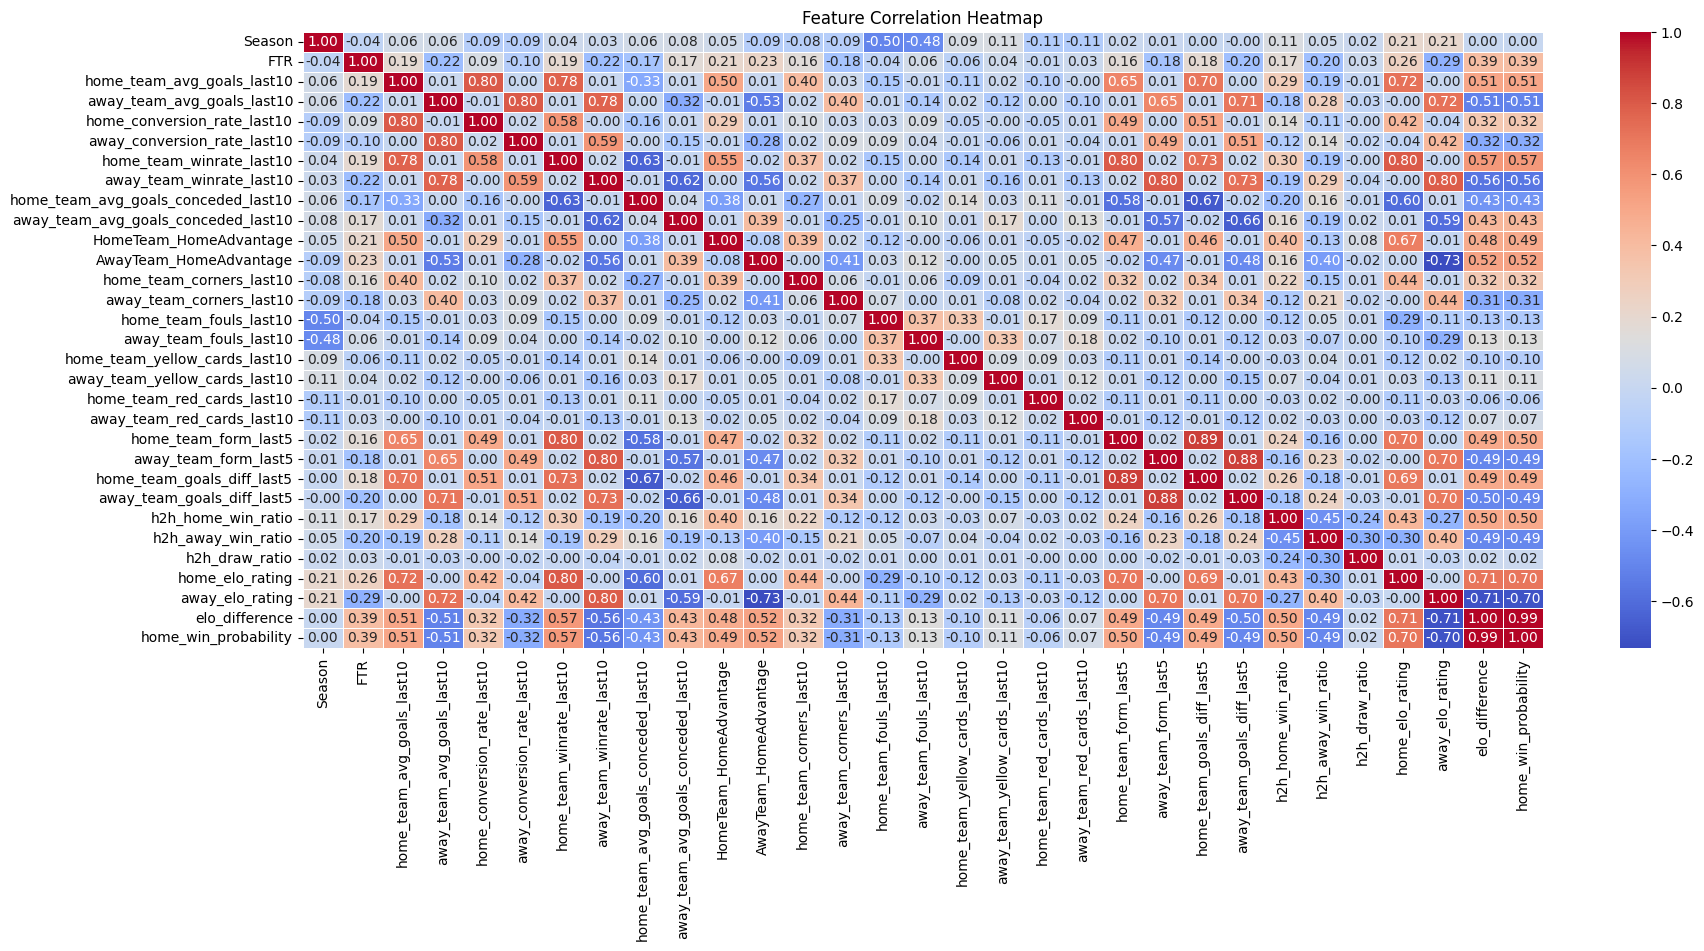

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



numeric_df = df.select_dtypes(include=['number']).drop(columns=[
    'HTHG', 'HTAG', 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST',
    'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
])
corr = numeric_df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [44]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,away_team_form_last5,home_team_goals_diff_last5,away_team_goals_diff_last5,h2h_home_win_ratio,h2h_away_win_ratio,h2h_draw_ratio,home_elo_rating,away_elo_rating,elo_difference,home_win_probability
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,0.00,0.00,0.00,0.0,0.0,0.0,1500.000000,1500.000000,0.000000,0.500000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,3.00,-1.00,1.00,0.0,0.0,0.0,1484.000000,1516.000000,-32.000000,0.454078
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,1.50,0.50,0.50,0.0,0.0,0.0,1501.469502,1498.530498,2.939003,0.504229
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,2.00,0.00,1.00,0.0,0.0,0.0,1498.598171,1517.334159,-18.735988,0.473063
46,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,1.75,-1.25,0.75,0.0,0.0,0.0,1486.579956,1516.472170,-29.892214,0.457087
51,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,1.40,0.60,-0.40,0.0,0.0,0.0,1515.098969,1501.402364,13.696605,0.519701
63,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,2.20,0.00,1.00,0.0,0.0,0.0,1488.477941,1530.468544,-41.990603,0.439863
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,2.20,0.60,2.20,0.0,0.0,0.0,1528.544166,1552.831662,-24.287496,0.465104
84,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,2.00,0.40,0.80,0.0,0.0,0.0,1545.660828,1527.868686,17.792142,0.525583
91,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,2.20,0.40,0.60,0.0,0.0,0.0,1478.212957,1560.842185,-82.629228,0.383279


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['HomeTeam'] = le.fit_transform(df['HomeTeam'])
df['AwayTeam'] = le.fit_transform(df['AwayTeam'])

df['goals_diff_last10'] = df['home_team_avg_goals_last10'] - df['away_team_avg_goals_last10']
df['concede_diff_last10'] = df['home_team_avg_goals_conceded_last10'] - df['away_team_avg_goals_conceded_last10']
df['conversion_diff_last10'] = df['home_conversion_rate_last10'] - df['away_conversion_rate_last10']
df['winrate_diff_last10'] = df['home_team_winrate_last10'] - df['away_team_winrate_last10']
df['form_diff_last5'] = df['home_team_form_last5'] - df['away_team_form_last5']
features = [
    'home_team_avg_goals_last10',
    'away_team_avg_goals_last10',
    'home_conversion_rate_last10',
    'away_conversion_rate_last10',
    'home_team_winrate_last10',
    'away_team_winrate_last10',
    'home_team_avg_goals_conceded_last10',
    'away_team_avg_goals_conceded_last10',
    'home_team_corners_last10',
    'away_team_corners_last10',
    'home_team_fouls_last10',
    'away_team_fouls_last10',
    'home_team_yellow_cards_last10',
    'away_team_yellow_cards_last10',
    'home_team_red_cards_last10',
    'away_team_red_cards_last10',
    'HomeTeam_HomeAdvantage',
    'home_team_form_last5',
    'away_team_form_last5',
    'home_team_goals_diff_last5',
    'away_team_goals_diff_last5',
    'goals_diff_last10','concede_diff_last10',
    'conversion_diff_last10',
    'winrate_diff_last10',
    'home_elo_rating',
    'away_elo_rating',
    'elo_difference',
    'home_win_probability',
    'h2h_home_win_ratio',
   'h2h_away_win_ratio',
    'h2h_draw_ratio',
]

X = df[features]
y = df['FTR']

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [48]:
#baseline if model predicts all matches as Home Win (1.0)
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Baseline: predict all as Home Win (1.0)
y_pred_baseline = np.ones_like(y_test)

# Evaluate baseline performance
baseline_acc = accuracy_score(y_test, y_pred_baseline)
print("🏠 Baseline Accuracy (Always Home Win):", baseline_acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, digits=3))

##FTR
###Away Win    2417
###Draw        2069
###Home Win    3803


🏠 Baseline Accuracy (Always Home Win): 0.43546441495778043

Classification Report:
              precision    recall  f1-score   support

        -1.0      0.000     0.000     0.000       560
         0.0      0.000     0.000     0.000       376
         1.0      0.435     1.000     0.607       722

    accuracy                          0.435      1658
   macro avg      0.145     0.333     0.202      1658
weighted avg      0.190     0.435     0.264      1658



/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [49]:
#prediction using Logistic Regression

from xml.parsers.expat import model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_test)
train_score=modelLR.score(X_train, y_train)
print("Train Accuracy:", train_score)
test_score=modelLR.score(X_test, y_test)
print("Test Accuracy:", test_score)


Train Accuracy: 0.5308399939677273
Test Accuracy: 0.5428226779252111


/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
#prediction using XGBClassifier
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

label_map = {-1.0: 0, 0.0: 1, 1.0: 2}
inv_label_map = {v:k for k,v in label_map.items()}

y_train_enc = np.vectorize(label_map.get)(y_train.astype(float))
y_test_enc  = np.vectorize(label_map.get)(y_test.astype(float))

model = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    n_estimators=250,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_lambda=2.0,
    reg_alpha=1.0,
    random_state=42,
    eval_metric="mlogloss"
)

model.fit(X_train, y_train_enc)

y_pred_enc = model.predict(X_test)
train_acc = model.score(X_train, y_train_enc)
test_acc  = accuracy_score(y_test_enc, y_pred_enc)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.5889006183079475
Test Accuracy: 0.5301568154402895


In [51]:
#prediction using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=600,
    max_depth=6,
    random_state=42
)
rf.fit(X_train, y_train)
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

Train Accuracy: 0.5561755391343689
Test Accuracy: 0.5271411338962606


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get coefficients from trained model
coefficients = modelLR.coef_[0]

# Create a DataFrame for clarity
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display
print(feature_importance.head(10))
print(feature_importance.tail(10))

                          Feature  Coefficient
17           home_team_form_last5     0.132399
30             h2h_away_win_ratio     0.093390
13  away_team_yellow_cards_last10     0.089429
29             h2h_home_win_ratio     0.084977
9        away_team_corners_last10     0.073010
1      away_team_avg_goals_last10     0.053909
12  home_team_yellow_cards_last10     0.051215
20     away_team_goals_diff_last5     0.042333
23         conversion_diff_last10     0.041202
0      home_team_avg_goals_last10     0.038493
                                Feature  Coefficient
7   away_team_avg_goals_conceded_last10    -0.009030
21                    goals_diff_last10    -0.015416
14           home_team_red_cards_last10    -0.022046
3           away_conversion_rate_last10    -0.024039
11               away_team_fouls_last10    -0.026566
19           home_team_goals_diff_last5    -0.044433
8              home_team_corners_last10    -0.046374
31                       h2h_draw_ratio    -0.088598
18    

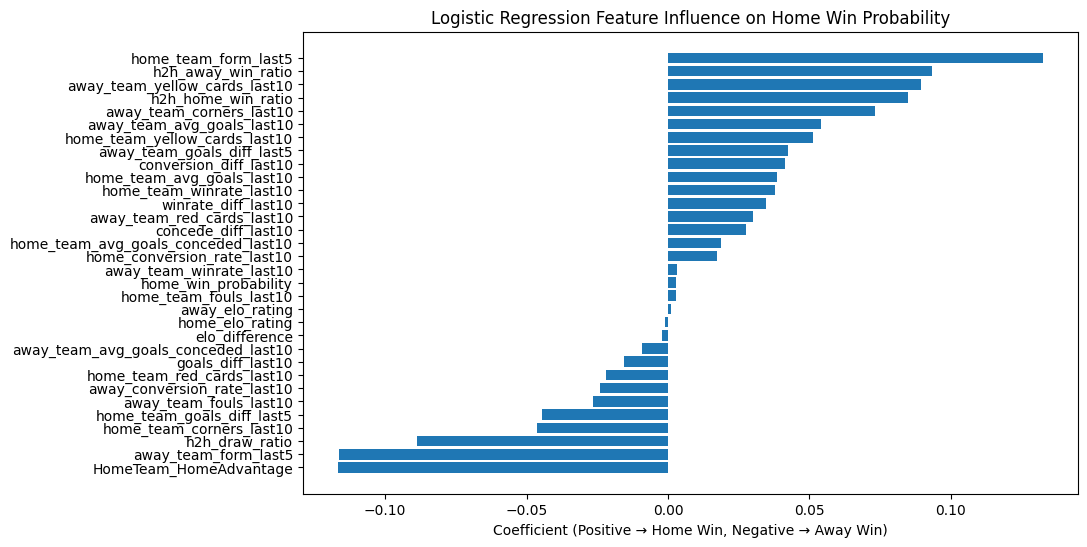

In [53]:
plt.figure(figsize=(10,6))
feature_importance.sort_values('Coefficient', inplace=True)
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.title("Logistic Regression Feature Influence on Home Win Probability")
plt.xlabel("Coefficient (Positive → Home Win, Negative → Away Win)")
plt.show()

In [54]:
def predict_match_lr(home_team, away_team, match_date, df, model_lr, le, features):
    """
    Predict match outcome using Logistic Regression model
    """
    print(f"🔮 Predicting with Logistic Regression: {home_team} vs {away_team} on {match_date}")
    print("="*60)

    # Convert team names to encoded values
    team_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

    if home_team not in team_mapping or away_team not in team_mapping:
        print(f"❌ Error: Team not found in training data!")
        return None

    home_team_encoded = team_mapping[home_team]
    away_team_encoded = team_mapping[away_team]
    match_date_dt = pd.to_datetime(match_date)

    # Get recent data
    recent_data = df[df['DateTime'] < match_date_dt].copy()

    if len(recent_data) == 0:
        print(f"❌ No historical data available before {match_date}")
        return None

    # Get latest features for both teams
    home_recent = recent_data[
        (recent_data['HomeTeam'] == home_team_encoded) |
        (recent_data['AwayTeam'] == home_team_encoded)
    ].iloc[-1] if len(recent_data[(recent_data['HomeTeam'] == home_team_encoded) |
                                   (recent_data['AwayTeam'] == home_team_encoded)]) > 0 else None

    away_recent = recent_data[
        (recent_data['HomeTeam'] == away_team_encoded) |
        (recent_data['AwayTeam'] == away_team_encoded)
    ].iloc[-1] if len(recent_data[(recent_data['HomeTeam'] == away_team_encoded) |
                                   (recent_data['AwayTeam'] == away_team_encoded)]) > 0 else None

    if home_recent is None or away_recent is None:
        print(f"❌ Insufficient recent data for one or both teams")
        return None

    # Create feature vector
    prediction_features = {}

    for feature in features:
        if feature.startswith('home_team_'):
            base_feature = feature.replace('home_team_', '')
            if f'home_team_{base_feature}' in home_recent.index:
                if home_recent['HomeTeam'] == home_team_encoded:
                    prediction_features[feature] = home_recent[f'home_team_{base_feature}']
                else:
                    prediction_features[feature] = home_recent[f'away_team_{base_feature}']
            else:
                prediction_features[feature] = 0.0

        elif feature.startswith('away_team_'):
            base_feature = feature.replace('away_team_', '')
            if f'away_team_{base_feature}' in away_recent.index:
                if away_recent['AwayTeam'] == away_team_encoded:
                    prediction_features[feature] = away_recent[f'away_team_{base_feature}']
                else:
                    prediction_features[feature] = away_recent[f'home_team_{base_feature}']
            else:
                prediction_features[feature] = 0.0

        elif feature in ['goals_diff_last10', 'concede_diff_last10', 'conversion_diff_last10',
                        'winrate_diff_last10', 'form_diff_last5']:
            if feature == 'goals_diff_last10':
                home_val = prediction_features.get('home_team_avg_goals_last10', 0)
                away_val = prediction_features.get('away_team_avg_goals_last10', 0)
            elif feature == 'concede_diff_last10':
                home_val = prediction_features.get('home_team_avg_goals_conceded_last10', 0)
                away_val = prediction_features.get('away_team_avg_goals_conceded_last10', 0)
            elif feature == 'conversion_diff_last10':
                home_val = prediction_features.get('home_conversion_rate_last10', 0)
                away_val = prediction_features.get('away_conversion_rate_last10', 0)
            elif feature == 'winrate_diff_last10':
                home_val = prediction_features.get('home_team_winrate_last10', 0)
                away_val = prediction_features.get('away_team_winrate_last10', 0)
            elif feature == 'form_diff_last5':
                home_val = prediction_features.get('home_team_form_last5', 0)
                away_val = prediction_features.get('away_team_form_last5', 0)

            prediction_features[feature] = home_val - away_val

        elif feature in home_recent.index:
            prediction_features[feature] = home_recent[feature]
        else:
            prediction_features[feature] = 0.0

    # Create feature array
    feature_vector = [prediction_features.get(f, 0.0) for f in features]
    feature_array = np.array(feature_vector).reshape(1, -1)

    # Make prediction with Logistic Regression
    probabilities = model_lr.predict_proba(feature_array)[0]
    prediction = model_lr.predict(feature_array)[0]

    # Logistic Regression classes are [-1.0, 0.0, 1.0] (Away, Draw, Home)
    prob_dict = {
        'Away Win': probabilities[0],   # -1.0
        'Draw': probabilities[1],       # 0.0
        'Home Win': probabilities[2]    # 1.0
    }

    # Interpret prediction
    if prediction == 1.0:
        outcome = f"🏠 {home_team} Win"
    elif prediction == -1.0:
        outcome = f"✈️ {away_team} Win"
    else:
        outcome = "🤝 Draw"

    # Results
    results = {
        'home_team': home_team,
        'away_team': away_team,
        'prediction': outcome,
        'probabilities': prob_dict,
        'features_used': prediction_features
    }

    # Display results
    print("all teams mapped:", team_mapping)
    print(f"⚽ Match: {home_team}(home) vs {away_team}(away)")
    print(f"📅 Match Date: {match_date}")
    print(f"🎯 **PREDICTION: {outcome}**")
    print(f"\n📊 **Probabilities:**")
    for outcome_type, prob in prob_dict.items():
        print(f"   {outcome_type}: {prob:.3f} ({prob*100:.1f}%)")
    print(f"\n🎯 **Confidence:** {max(prob_dict.values()):.3f} ({max(prob_dict.values())*100:.1f}%)")

    return results

# Use the Logistic Regression prediction function
result_lr = predict_match_lr(
    home_team="Arsenal",
    away_team="Chelsea",
    match_date="2024-12-01",
    df=df,
    model_lr=modelLR,
    le=le,
    features=features
)

🔮 Predicting with Logistic Regression: Arsenal vs Chelsea on 2024-12-01
all teams mapped: {'Arsenal': 0, 'Aston Villa': 1, 'Birmingham': 2, 'Blackburn': 3, 'Blackpool': 4, 'Bolton': 5, 'Bournemouth': 6, 'Bradford': 7, 'Brentford': 8, 'Brighton': 9, 'Burnley': 10, 'Cardiff': 11, 'Charlton': 12, 'Chelsea': 13, 'Coventry': 14, 'Crystal Palace': 15, 'Derby': 16, 'Everton': 17, 'Fulham': 18, 'Huddersfield': 19, 'Hull': 20, 'Ipswich': 21, 'Leeds': 22, 'Leicester': 23, 'Liverpool': 24, 'Man City': 25, 'Man United': 26, 'Middlesbrough': 27, 'Newcastle': 28, 'Norwich': 29, 'Portsmouth': 30, 'QPR': 31, 'Reading': 32, 'Sheffield United': 33, 'Southampton': 34, 'Stoke': 35, 'Sunderland': 36, 'Swansea': 37, 'Tottenham': 38, 'Watford': 39, 'West Brom': 40, 'West Ham': 41, 'Wigan': 42, 'Wolves': 43}
⚽ Match: Arsenal(home) vs Chelsea(away)
📅 Match Date: 2024-12-01
🎯 **PREDICTION: 🏠 Arsenal Win**

📊 **Probabilities:**
   Away Win: 0.123 (12.3%)
   Draw: 0.225 (22.5%)
   Home Win: 0.652 (65.2%)

🎯 **Con

/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [55]:
result_lr = predict_match_lr(
    home_team="Man United",
    away_team="Liverpool",
    match_date="2009-09-01",
    df=df,
    model_lr=modelLR,
    le=le,
    features=features
)

🔮 Predicting with Logistic Regression: Man United vs Liverpool on 2009-09-01
all teams mapped: {'Arsenal': 0, 'Aston Villa': 1, 'Birmingham': 2, 'Blackburn': 3, 'Blackpool': 4, 'Bolton': 5, 'Bournemouth': 6, 'Bradford': 7, 'Brentford': 8, 'Brighton': 9, 'Burnley': 10, 'Cardiff': 11, 'Charlton': 12, 'Chelsea': 13, 'Coventry': 14, 'Crystal Palace': 15, 'Derby': 16, 'Everton': 17, 'Fulham': 18, 'Huddersfield': 19, 'Hull': 20, 'Ipswich': 21, 'Leeds': 22, 'Leicester': 23, 'Liverpool': 24, 'Man City': 25, 'Man United': 26, 'Middlesbrough': 27, 'Newcastle': 28, 'Norwich': 29, 'Portsmouth': 30, 'QPR': 31, 'Reading': 32, 'Sheffield United': 33, 'Southampton': 34, 'Stoke': 35, 'Sunderland': 36, 'Swansea': 37, 'Tottenham': 38, 'Watford': 39, 'West Brom': 40, 'West Ham': 41, 'Wigan': 42, 'Wolves': 43}
⚽ Match: Man United(home) vs Liverpool(away)
📅 Match Date: 2009-09-01
🎯 **PREDICTION: 🏠 Man United Win**

📊 **Probabilities:**
   Away Win: 0.210 (21.0%)
   Draw: 0.244 (24.4%)
   Home Win: 0.546 (54

/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [56]:
result_lr = predict_match_lr(
    home_team="Watford",
    away_team="Liverpool",
    match_date="2016-09-10",
    df=df,
    model_lr=modelLR,
    le=le,
    features=features
)

🔮 Predicting with Logistic Regression: Watford vs Liverpool on 2016-09-10
all teams mapped: {'Arsenal': 0, 'Aston Villa': 1, 'Birmingham': 2, 'Blackburn': 3, 'Blackpool': 4, 'Bolton': 5, 'Bournemouth': 6, 'Bradford': 7, 'Brentford': 8, 'Brighton': 9, 'Burnley': 10, 'Cardiff': 11, 'Charlton': 12, 'Chelsea': 13, 'Coventry': 14, 'Crystal Palace': 15, 'Derby': 16, 'Everton': 17, 'Fulham': 18, 'Huddersfield': 19, 'Hull': 20, 'Ipswich': 21, 'Leeds': 22, 'Leicester': 23, 'Liverpool': 24, 'Man City': 25, 'Man United': 26, 'Middlesbrough': 27, 'Newcastle': 28, 'Norwich': 29, 'Portsmouth': 30, 'QPR': 31, 'Reading': 32, 'Sheffield United': 33, 'Southampton': 34, 'Stoke': 35, 'Sunderland': 36, 'Swansea': 37, 'Tottenham': 38, 'Watford': 39, 'West Brom': 40, 'West Ham': 41, 'Wigan': 42, 'Wolves': 43}
⚽ Match: Watford(home) vs Liverpool(away)
📅 Match Date: 2016-09-10
🎯 **PREDICTION: ✈️ Liverpool Win**

📊 **Probabilities:**
   Away Win: 0.580 (58.0%)
   Draw: 0.232 (23.2%)
   Home Win: 0.188 (18.8%)



/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:
result_lr = predict_match_lr(
    home_team="Man United",
    away_team="Sunderland",
    match_date="2017-04-20",
    df=df,
    model_lr=modelLR,
    le=le,
    features=features
)

🔮 Predicting with Logistic Regression: Man United vs Sunderland on 2017-04-20
all teams mapped: {'Arsenal': 0, 'Aston Villa': 1, 'Birmingham': 2, 'Blackburn': 3, 'Blackpool': 4, 'Bolton': 5, 'Bournemouth': 6, 'Bradford': 7, 'Brentford': 8, 'Brighton': 9, 'Burnley': 10, 'Cardiff': 11, 'Charlton': 12, 'Chelsea': 13, 'Coventry': 14, 'Crystal Palace': 15, 'Derby': 16, 'Everton': 17, 'Fulham': 18, 'Huddersfield': 19, 'Hull': 20, 'Ipswich': 21, 'Leeds': 22, 'Leicester': 23, 'Liverpool': 24, 'Man City': 25, 'Man United': 26, 'Middlesbrough': 27, 'Newcastle': 28, 'Norwich': 29, 'Portsmouth': 30, 'QPR': 31, 'Reading': 32, 'Sheffield United': 33, 'Southampton': 34, 'Stoke': 35, 'Sunderland': 36, 'Swansea': 37, 'Tottenham': 38, 'Watford': 39, 'West Brom': 40, 'West Ham': 41, 'Wigan': 42, 'Wolves': 43}
⚽ Match: Man United(home) vs Sunderland(away)
📅 Match Date: 2017-04-20
🎯 **PREDICTION: 🏠 Man United Win**

📊 **Probabilities:**
   Away Win: 0.245 (24.5%)
   Draw: 0.229 (22.9%)
   Home Win: 0.526 (

/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/ali30/.pyenv/versions/premier-league/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
print("Features used for prediction:", list(result_lr['features_used'].keys()))


Features used for prediction: ['home_team_avg_goals_last10', 'away_team_avg_goals_last10', 'home_conversion_rate_last10', 'away_conversion_rate_last10', 'home_team_winrate_last10', 'away_team_winrate_last10', 'home_team_avg_goals_conceded_last10', 'away_team_avg_goals_conceded_last10', 'home_team_corners_last10', 'away_team_corners_last10', 'home_team_fouls_last10', 'away_team_fouls_last10', 'home_team_yellow_cards_last10', 'away_team_yellow_cards_last10', 'home_team_red_cards_last10', 'away_team_red_cards_last10', 'HomeTeam_HomeAdvantage', 'home_team_form_last5', 'away_team_form_last5', 'home_team_goals_diff_last5', 'away_team_goals_diff_last5', 'goals_diff_last10', 'concede_diff_last10', 'conversion_diff_last10', 'winrate_diff_last10', 'home_elo_rating', 'away_elo_rating', 'elo_difference', 'home_win_probability', 'h2h_home_win_ratio', 'h2h_away_win_ratio', 'h2h_draw_ratio']


In [ ]:
# Save the trained model and preprocessing components
import joblib
import json

# Create a directory for model artifacts if it doesn't exist
import os
os.makedirs('../models', exist_ok=True)

# Save the best model (let's use Random Forest as it performed well)
joblib.dump(rf_optimized, '../models/rf_model.pkl')

# Save the scaler if you used one
# joblib.dump(scaler, '../models/scaler.pkl')

# Save the label encoder
joblib.dump(le, '../models/label_encoder.pkl')

# Save the feature names
feature_names = list(X_train.columns)
with open('../models/feature_names.json', 'w') as f:
    json.dump(feature_names, f)

print("Model and components saved successfully!")
print(f"Feature count: {len(feature_names)}")
print(f"Features saved: {feature_names[:10]}...")  # Show first 10 features


NameError: name 'rf_optimized' is not defined